In [7]:
#Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
def poly_reg (X, t, power, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, t) #Fit the transformed features 
  y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 

  #evaluate test data 
  X_poly_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_poly_eval= lin_reg.predict(X_poly_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_poly_eval)) 

  #Plot 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0) #sort the input based on index 0 (x value in this case)
  sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis) #Check out the sorting documentation(https://docs.python.org/2/howto/sorting.html)
  X_plot, y_poly_pred_plot = zip(*sorted_zip) #X and y values ready for plotting #Print the output to see if it makes sense. 
  #check the example (https://stackoverflow.com/questions/44233099/what-does-zipres-mean-in-python-in-the-following-code)
  ax = fig.add_subplot(2,3,int(str(i+1))) #For the first plot, i=0, subplot(2,3,1). 2x3 is the plotting dimension (total of 6 figures divided
  #into 2 rows and three columns). 1 is the subplot number (value range from 1 to 6)
  ax.scatter(X, t, s=10)  #Plot X and its true labels to compare it to our predictions  
  ax.plot(X_plot, y_poly_pred_plot, color='m') #Plot sorted X and predictions 
  return lin_reg.intercept_, lin_reg.coef_.tolist()[0], rmse, rmse_test

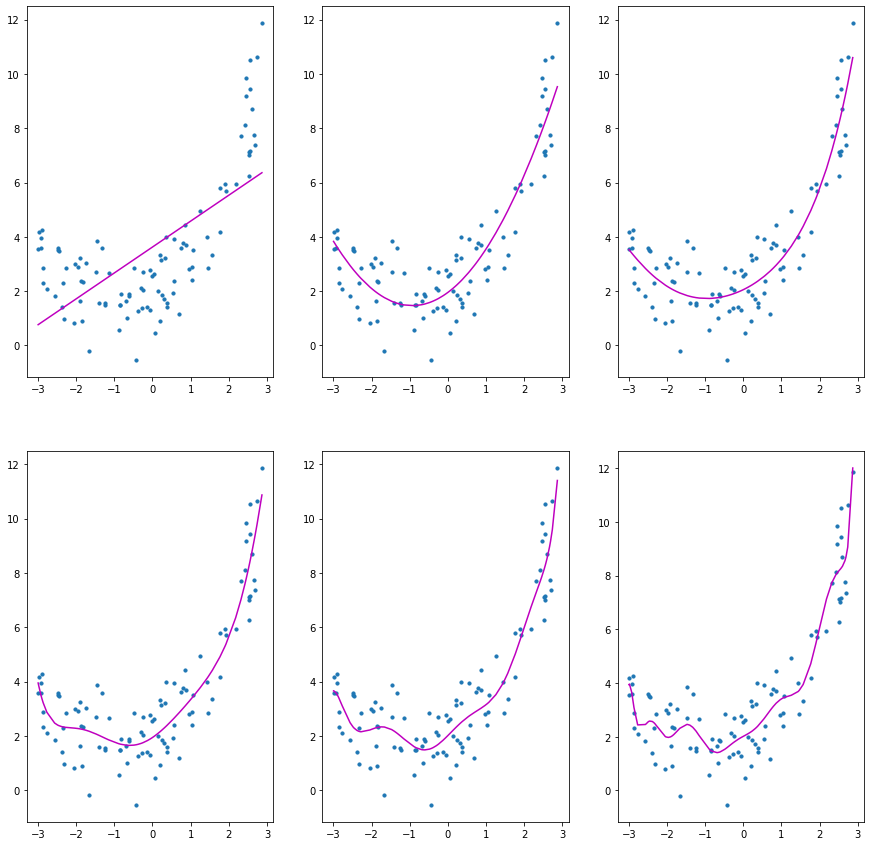

In [9]:
fig = plt.figure(figsize=(15,15)) #Define the figure size
#Create training data
m = 100
X = 6 * np.random.rand(m, 1) - 3
t = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#create test data
m = 20
X_test = 10*np.random.rand(m, 1)-4
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

#Call poly_reg 
#Create empty dictionaries for each attribute and fill them in the loop
coeff= {} 
rmse= {}
rmse_test={}
powers= [1,2,5,7,9,15]
for i in range (len(powers)):
  power= powers[i]
  intercept,coeff[power],rmse[power], rmse_test[power]= poly_reg (X, t, power, i, X_test, t_test)

plt.show() #show all the created subplots